In [45]:
# this is an example of using the SARIMAX model for time series forecasting

In [46]:
# import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [47]:
# Reading csv file to dataframe
df = pd.read_csv('json files/combined_data.csv')
df = df[0::22] # only take every 22th row
df.head()

,year,month,day,hour,zone,longitude,latitude,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temperature,dewpt
0,2021,1,1,0,1,74.28,31.38,5,4058.84,30.40,42.16,0.00,9.78,395.20,484.22,26.35,5.6,4.3
22,2021,1,1,1,1,74.28,31.38,5,5447.39,63.48,44.55,0.00,12.16,488.46,585.86,27.11,5.4,4.5
44,2021,1,1,2,1,74.28,31.38,5,8117.68,135.90,48.67,0.00,16.69,658.20,779.81,33.44,4.4,4.4
66,2021,1,1,3,1,74.28,31.38,5,11856.08,243.19,59.63,0.05,21.46,863.67,1015.06,39.52,5.3,4.8
88,2021,1,1,4,1,74.28,31.38,5,12603.76,250.34,83.63,1.23,24.80,883.55,1027.48,41.54,5.7,4.6


In [48]:
# # converting date time to pandas datetime
date_time=pd.to_datetime(df[['year','month','day','hour']])

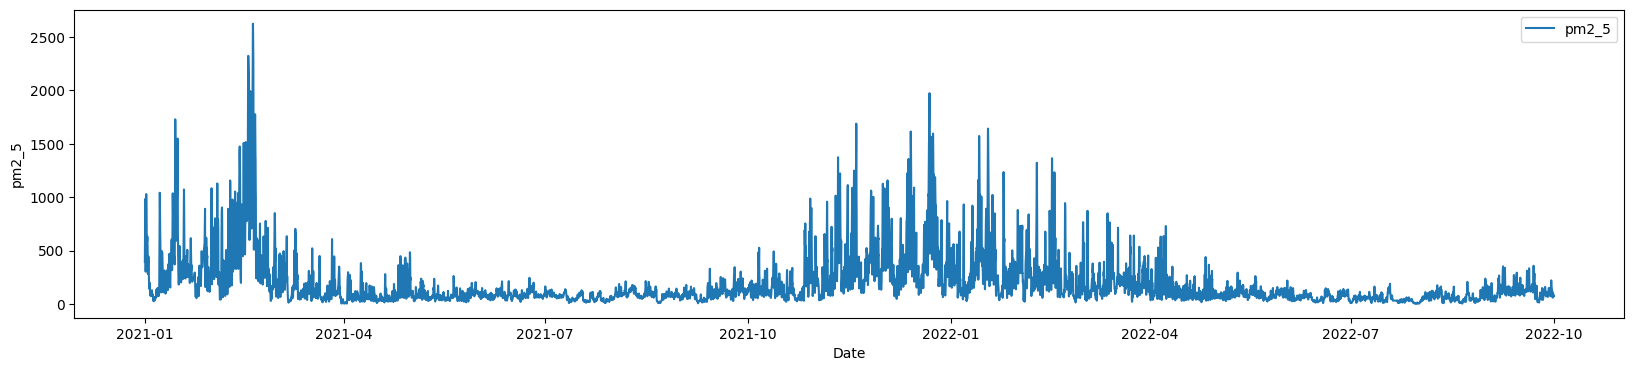

In [49]:
# plotting pm2_5 against date
plt.figure(figsize=(20,4))
plt.plot(date_time,df['pm2_5'],label='pm2_5')
plt.xlabel('Date')
plt.ylabel('pm2_5')
plt.legend(loc='best')
plt.show()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.41027D+00    |proj g|=  3.72753D-02


 This problem is unconstrained.



At iterate    5    f=  5.38511D+00    |proj g|=  8.59471D-03

At iterate   10    f=  5.36684D+00    |proj g|=  9.76933D-03

At iterate   15    f=  5.32877D+00    |proj g|=  2.51639D-02

At iterate   20    f=  5.25211D+00    |proj g|=  2.04275D-01

At iterate   25    f=  5.20843D+00    |proj g|=  1.04978D-02

At iterate   30    f=  5.20824D+00    |proj g|=  3.65095D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     44      1     0     0   3.651D-06   5.208D+00
  F =   5.2082403090177865     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Result

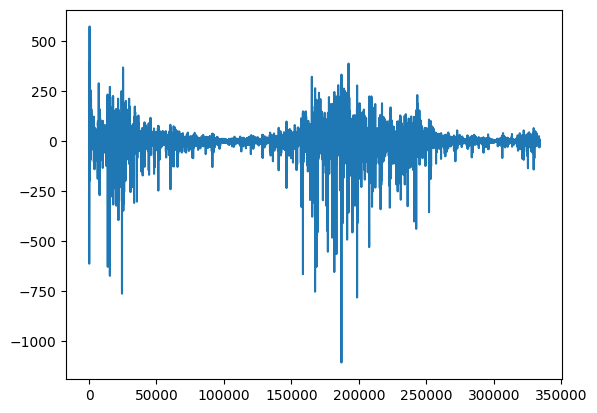

In [50]:
# implementing sarimax model
model = SARIMAX(df['pm2_5'],order=(1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()
print(results.summary())

# plotting the residuals
results.resid.plot()
plt.show()

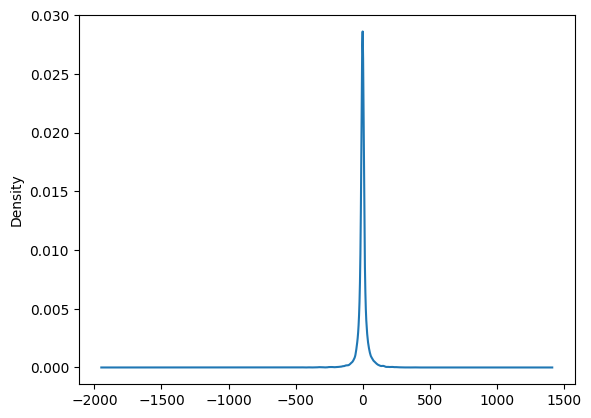

count    15191.000000
mean         0.009943
std         45.101970
min      -1107.828394
25%         -7.540240
50%          0.124447
75%          8.248494
max        573.734888
dtype: float64


/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


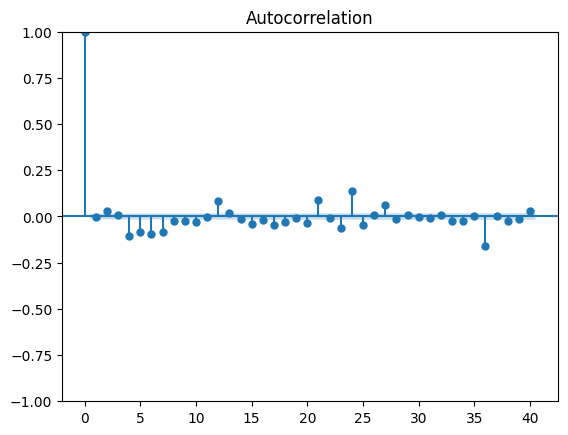

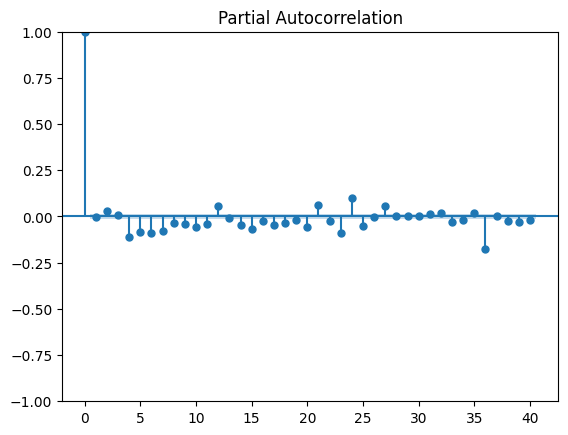

In [51]:
# plotting the density of the residuals
results.resid.plot(kind='kde')
plt.show()

# printing the summary statistics of the residuals
print(results.resid.describe())

# plotting the acf and pacf of the residuals
plot_acf(results.resid, lags=40)
plot_pacf(results.resid, lags=40)
plt.show()

In [52]:
# forecasting the model
forecast = results.predict(start = len(df), end = len(df)+23+(24*6), dynamic= True)
forecast = forecast.rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

In [53]:
date_time1 = pd.date_range(start='2022-10-1', periods=24*7, freq='H')
date_time1

DatetimeIndex(['2022-10-01 00:00:00', '2022-10-01 01:00:00',
               '2022-10-01 02:00:00', '2022-10-01 03:00:00',
               '2022-10-01 04:00:00', '2022-10-01 05:00:00',
               '2022-10-01 06:00:00', '2022-10-01 07:00:00',
               '2022-10-01 08:00:00', '2022-10-01 09:00:00',
               ...
               '2022-10-07 14:00:00', '2022-10-07 15:00:00',
               '2022-10-07 16:00:00', '2022-10-07 17:00:00',
               '2022-10-07 18:00:00', '2022-10-07 19:00:00',
               '2022-10-07 20:00:00', '2022-10-07 21:00:00',
               '2022-10-07 22:00:00', '2022-10-07 23:00:00'],
              dtype='datetime64[ns]', length=168, freq='H')

In [54]:
date_time

0        2021-01-01 00:00:00
22       2021-01-01 01:00:00
44       2021-01-01 02:00:00
66       2021-01-01 03:00:00
88       2021-01-01 04:00:00
                 ...        
334092   2022-09-30 19:00:00
334114   2022-09-30 20:00:00
334136   2022-09-30 21:00:00
334158   2022-09-30 22:00:00
334180   2022-09-30 23:00:00
Length: 15191, dtype: datetime64[ns]

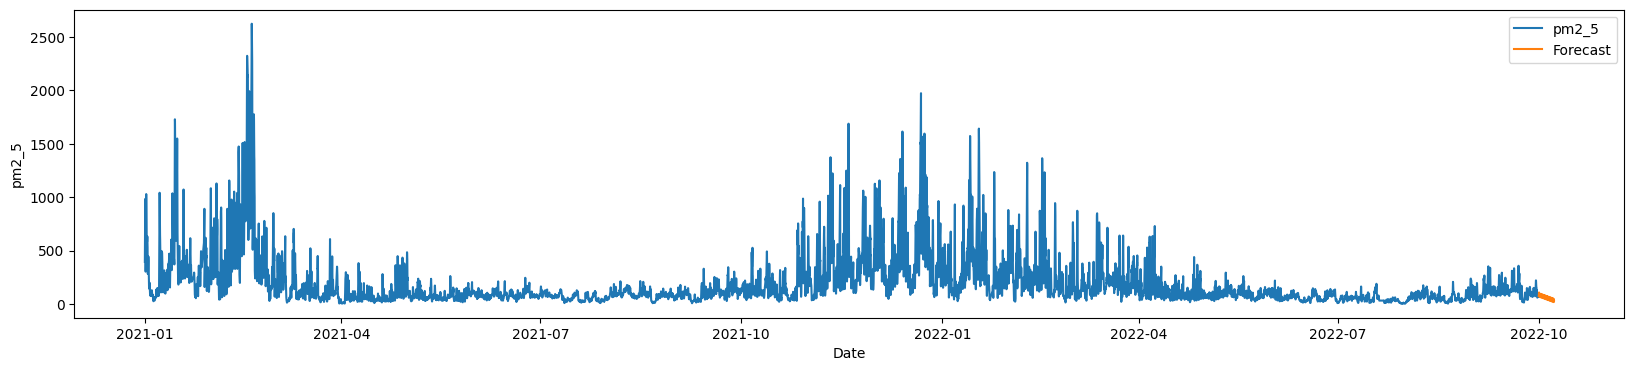

In [55]:
# plotting the forecast
plt.figure(figsize=(20,4))
plt.plot(date_time,df['pm2_5'],label='pm2_5')
plt.plot(date_time1,forecast,label='Forecast')
plt.xlabel('Date')
plt.ylabel('pm2_5')
plt.legend(loc='best')
plt.show()

In [56]:
# predicting the next month
forecast = results.predict(start = len(df), end = len(df)+23+(24*30), dynamic= True)
forecast = forecast.rename('SARIMA(1,1,1)(1,1,1,12) Forecast')

date_time2 = pd.date_range(start='2022-10-1', periods=24*31, freq='H')

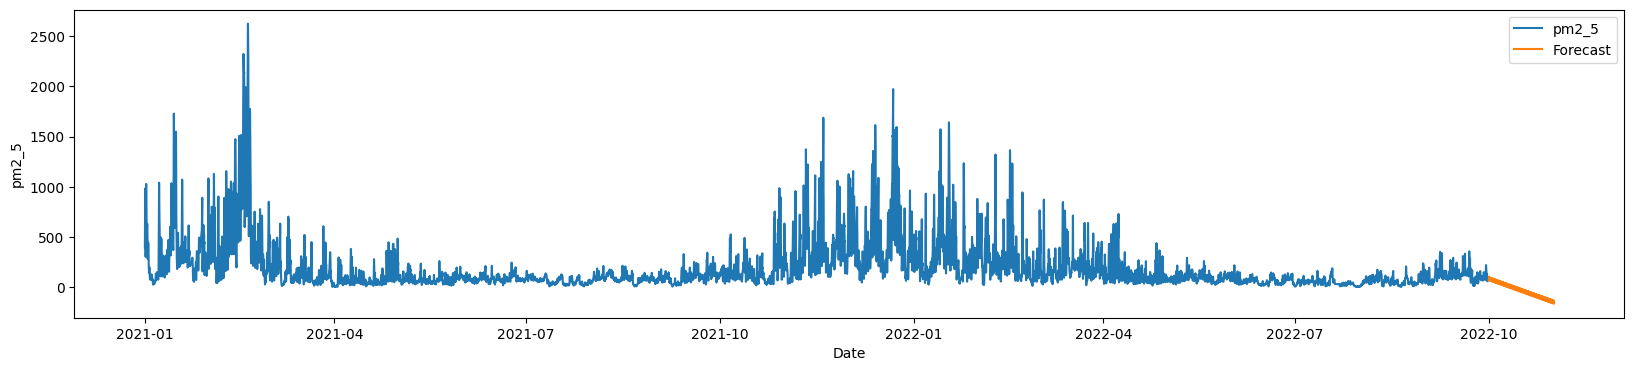

In [57]:
# plotting the forecast
plt.figure(figsize=(20,4))
plt.plot(date_time,df['pm2_5'],label='pm2_5')
plt.plot(date_time2,forecast,label='Forecast')
plt.xlabel('Date')
plt.ylabel('pm2_5')
plt.legend(loc='best')
plt.show()

In [58]:
# correct this code for proper prediction using other variables